# Reaging GANs

## data pre

In [38]:
%pwd

'/content/RAGAN'

In [36]:
import os
import cv2
from torch.utils.data import TensorDataset, DataLoader, Dataset
from tqdm import tqdm

In [39]:
os.listdir('./data/')

['5', '.DS_Store', '35', '65']

In [40]:
os.remove('./data/.DS_Store')

In [47]:
input_images = None
input_ages = torch.tensor([])
output_images = None
output_ages = torch.tensor([])

In [41]:
for age_group in os.listdir('./data/'):
  print(f'age: {age_group} -> len: {len(os.listdir(f"./data/{age_group}"))}')

age: 5 -> len: 28
age: 35 -> len: 27
age: 65 -> len: 30


In [ ]:
for age in os.listdir('./data/'):
  for img in os.listdir('./data/'+age+'/'):
    _img = cv2.imread('./data/'+age+'/'+img)
    print(f'age: {age}, img: {img}, size: {_img.shape}')

In [49]:
import os
import cv2

# 폴더 경로들
folder_paths = ['/content/RAGAN/data/35', '/content/RAGAN/data/65', '/content/RAGAN/data/5']

# 각 폴더에 대해 반복 수행
for folder_path in folder_paths:
    # 폴더 내의 모든 파일 순회
    for filename in os.listdir(folder_path):
        # 이미지 파일인 경우에만 처리
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # 이미지 파일의 경로
            image_path = os.path.join(folder_path, filename)

            # 이미지를 로드합니다.
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)

            # 이미지 크기를 조정합니다.
            resized_image = cv2.resize(image, (200, 200))

            # 조정된 이미지를 저장합니다.
            cv2.imwrite(image_path, resized_image)


In [45]:
def get_encode(age):
  if age == '5':
    return 0
  elif age == '35':
    return 1

  return 2

In [51]:
for age1 in os.listdir('./data/'):
    for age2 in tqdm(os.listdir('./data/'), desc=f'Age: {age1}'):
        if age1 != age2:
            for file1 in os.listdir(f'./data/{age1}'):
                img1 = cv2.imread(f'./data/{age1}/{file1}', cv2.IMREAD_COLOR)
                img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
                img1 = cv2.resize(img1, None, fx=1.28, fy=1.28)
                img1 = torch.tensor(img1).permute(2, 1, 0).unsqueeze(0)
                for file2 in os.listdir(f'./data/{age2}'):
                    img2 = cv2.imread(f'./data/{age2}/{file2}', cv2.IMREAD_COLOR)
                    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
                    img2 = cv2.resize(img2, None, fx=1.28, fy=1.28)
                    img2 = torch.Tensor(img2).permute(2, 1, 0).unsqueeze(0)

                    if input_images is None:
                        input_images = img1
                    else:
                        input_images = torch.cat([input_images, img1], axis=0)
                    input_ages = torch.cat([input_ages, torch.Tensor([get_encode(age1)])])

                    if output_images is None:
                        output_images = img2
                    else:
                        output_images = torch.cat([output_images, img2], axis=0)
                    output_ages = torch.cat([output_ages, torch.Tensor([get_encode(age2)])])
    print(f'input_images: {input_images.shape}, input_age: {input_ages.shape}, output_images: {output_images.shape}, output ages: {output_ages.shape}')

Age: 5: 100%|██████████| 3/3 [06:10<00:00, 123.50s/it]


input_images: torch.Size([1596, 3, 256, 256]), input_age: torch.Size([1596]), output_images: torch.Size([1596, 3, 256, 256]), output ages: torch.Size([1596])


Age: 35: 100%|██████████| 3/3 [18:01<00:00, 360.65s/it]


input_images: torch.Size([3162, 3, 256, 256]), input_age: torch.Size([3162]), output_images: torch.Size([3162, 3, 256, 256]), output ages: torch.Size([3162])


Age: 65: 100%|██████████| 3/3 [31:58<00:00, 639.37s/it]

input_images: torch.Size([4812, 3, 256, 256]), input_age: torch.Size([4812]), output_images: torch.Size([4812, 3, 256, 256]), output ages: torch.Size([4812])


In [52]:
torch.save(input_images, './data/input_images.pth')
torch.save(input_ages, './data/input_ages.pth')
torch.save(input_images, './data/output_images.pth')
torch.save(input_ages, './data/output_ages.pth')

In [56]:
%pwd

'/content/RAGAN'

In [54]:
!mkdir img

In [59]:
import zipfile
import os

# 폴더 경로
folder_path = '/content/RAGAN/data'

# 압축 파일 이름
zip_file_name = 'ragan_img2.zip'

# 압축 파일 객체 생성
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    # 폴더 내의 모든 파일과 하위 폴더를 순회
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # 파일의 절대 경로
            file_path = os.path.join(root, file)
            # 파일을 압축 파일에 추가
            zipf.write(file_path)


In [57]:
%cd /content/

/content


In [ ]:
!unzip /content/ragan_img2.zip

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
!cp /content/ragan_img2.zip /content/drive/MyDrive/CV/GAN/ragan_img2.zip

## 이제 시작

In [5]:
!git clone https://github.com/aneesh-aparajit/RAGAN.git
!pip install -q wandb watermark

fatal: destination path 'RAGAN' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.8 MB/s eta 0:00:00


In [6]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import typing
import wandb
import os
from tqdm.notebook import tqdm
import cv2
import time

# wandb.login()

%load_ext watermark
%watermark -a "JO HYUN WOOK" -p torch,typing,wandb,tqdm,cv2,os,time

Author: JO HYUN WOOK

torch : 2.0.1+cu118
typing: unknown
wandb : 0.15.5
tqdm  : 4.65.0
cv2   : 4.7.0
os    : unknown
time  : unknown



# Utilities

## Convolutional Block

In [7]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, stride: int = 2) -> None:
        super(ConvBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=4, stride=stride, padding=1),
            nn.BatchNorm2d(num_features=out_channels),
            nn.ReLU(inplace=False)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.conv(x)

## Transpose Convolutional Block

In [8]:
class TransposeConvBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, stride: int = 2) -> None:
        super(TransposeConvBlock, self).__init__()
        self.tran_conv = nn.Sequential(
            nn.ConvTranspose2d(in_channels=in_channels, out_channels=out_channels, kernel_size=4,
                               stride=stride, padding=1),
            nn.BatchNorm2d(num_features=out_channels),
            nn.ReLU(inplace=False)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.tran_conv(x)

# Discriminator

In [9]:
class Discriminator(nn.Module):
    '''Implementation is the same as Pix2Pix

    The forward method will have the the input image and the target image.
        - The target image may not be of the same person, so as result, we'll consider a few more loss functions like the reconstruction loss.
    '''
    def __init__(self, in_channels: int = 3, features: tuple = (64, 128, 256, 512), input_size: int = 128, num_age_groups: int = 3) -> None:
        super(Discriminator, self).__init__()
        self.inital = nn.Sequential(
            nn.Conv2d(in_channels=in_channels*2 + 2, out_channels=features[0], kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(negative_slope=0.2, inplace=False)
        )

        layers = []
        in_channels = features[0]

        for ix in range(1, len(features), 1):
            if ix == len(features) - 1:
                layers.append(ConvBlock(in_channels=in_channels, out_channels=features[ix], stride=1))
            else:
                layers.append(ConvBlock(in_channels=in_channels, out_channels=features[ix]))
            in_channels = features[ix]

        layers.append(nn.Conv2d(in_channels=in_channels, out_channels=1, kernel_size=4, stride=1, padding=1))

        self.model = nn.Sequential(*layers)

        self.input_size = input_size

        self.input_embed = nn.Embedding(num_embeddings=num_age_groups, embedding_dim=self.input_size ** 2)
        self.output_embed = nn.Embedding(num_embeddings=num_age_groups, embedding_dim=self.input_size ** 2)


    def forward(self, input_img: torch.Tensor, input_age: torch.Tensor, output_img: torch.Tensor, output_age: torch.Tensor) -> torch.Tensor:
        '''This is the forward call of the Discriminator

        Args:
        ----
            - input_tensor : Tuple[torch.Tensor, torch.Tensor]
                - The first element is the input image
                - The second element is the input age

            - output_tensor : Tuple[torch.Tensor, torch.Tensor]
                - The first element is the output image
                - The second element is the output age

        The considered solution, is similar to the original "Conditional Paper".
            - In this implementation, what we do is, we pass the input age embedding, output image, output age embedding.
                - The idea behind this is that the model will eventually learn the correlation between the pixel values in the input age, output image and the age groups.
                - Here, we can use a single age embedding layer, but I want to experiment with two different embedding layers of the input age and the output age.

        '''

        input_age_embed = self.input_embed(input_age).reshape(-1, 1, self.input_size, self.input_size)
        output_age_embed = self.output_embed(output_age).reshape(-1, 1, self.input_size, self.input_size)

        X = torch.cat([input_img, input_age_embed], dim=1)
        y = torch.cat([output_img, output_age_embed], dim=1)

        x = torch.cat([X, y], dim=1)
        x = self.inital(x)
        return self.model(x)

In [10]:
def test():
    X_img = torch.randn((5, 3, 256, 256))
    X_age = torch.LongTensor([2, 2, 1, 1, 2])

    y_img = torch.randn((5, 3, 256, 256))
    y_age = torch.LongTensor([2, 2, 0, 1, 2])

    model = Discriminator(input_size=256)

    print(f'\n[PROCESSING THE DATA...]\n')

    z = model.forward(X_img, X_age, y_img, y_age)

#     print(model)

    print(f'z: {z.shape}')

test()


[PROCESSING THE DATA...]

z: torch.Size([5, 1, 30, 30])


# Generator

In [11]:
class Generator(nn.Module):
    """This is essentially a U-Net type architecture. But, we'll pass the input age and the output age as well.

    So, if the in_channels = 3, then we'll pass 5 channels in the model.
        - 1 will be for the input_age embedding.
        - 2 will be for the output_age embedding.

    """

    def __init__(self, in_channels: int = 3, num_age_groups: int = 3, input_size: int = 128) -> None:
        super(Generator, self).__init__()

        self.input_embed = nn.Embedding(num_embeddings=num_age_groups, embedding_dim=input_size*input_size)
        self.output_embed = nn.Embedding(num_embeddings=num_age_groups, embedding_dim=input_size*input_size)
        self.input_size = input_size

        self.init_down = ConvBlock(in_channels=in_channels + 2, out_channels=64) # 5 -> 64

        self.down1 = ConvBlock(in_channels=64, out_channels=128) # 64 -> 128
        self.down2 = ConvBlock(in_channels=128, out_channels=256) # 128 -> 256
        self.down3 = ConvBlock(in_channels=256, out_channels=512) # 256 -> 512
        self.down4 = ConvBlock(in_channels=512, out_channels=512) # 512 -> 512
        self.down5 = ConvBlock(in_channels=512, out_channels=512) # 512 -> 512
        self.down6 = ConvBlock(in_channels=512, out_channels=512) # 512 -> 512

        # bottle neck
        self.bottle_neck = nn.Sequential(
            nn.Conv2d(512, 512, 4, 2, 1, padding_mode='reflect'),
            nn.LeakyReLU(negative_slope=0.2, inplace=False)
        ) #

        self.up1 = TransposeConvBlock(in_channels=512, out_channels=512) # 512 -> 512
        self.up2 = TransposeConvBlock(in_channels=1024, out_channels=512) # 512 -> 1024
        self.up3 = TransposeConvBlock(in_channels=1024, out_channels=512) # 1024 -> 1024
        self.up4 = TransposeConvBlock(in_channels=1024, out_channels=512) # 1024 -> 512
        self.up5 = TransposeConvBlock(in_channels=1024, out_channels=256) # 512 -> 256
        self.up6 = TransposeConvBlock(in_channels=512, out_channels=128) # 256 -> 128
        self.up7 = TransposeConvBlock(in_channels=256, out_channels=64) # 128 -> 64
        self.final_up = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        ) # 64 -> 3

    def forward(self, x: torch.Tensor, input_age: torch.Tensor, output_age: torch.Tensor) -> torch.Tensor:

        inp_embed = self.input_embed(input_age).reshape(input_age.shape[0], 1, self.input_size, self.input_size)
        out_embed = self.output_embed(output_age).reshape(output_age.shape[0], 1, self.input_size, self.input_size)

        y = torch.cat([x, inp_embed, out_embed], dim=1)
        d1 = self.init_down(y)
        d2 = self.down1(d1)
        d3 = self.down2(d2)
        d4 = self.down3(d3)
        d5 = self.down4(d4)
        d6 = self.down5(d5)
        d7 = self.down6(d6)
        bottle_neck = self.bottle_neck(d7)
        u1 = self.up1(bottle_neck)
        u2 = self.up2(torch.cat([u1, d7], dim=1))
        u3 = self.up3(torch.cat([u2, d6], dim=1))
        u4 = self.up4(torch.cat([u3, d5], dim=1))
        u5 = self.up5(torch.cat([u4, d4], dim=1))
        u6 = self.up6(torch.cat([u5, d3], dim=1))
        u7 = self.up7(torch.cat([u6, d2], dim=1))
        return self.final_up(torch.cat([u7, d1], dim=1))

In [12]:
def test():
    X_img = torch.randn((1, 3, 256, 256))
    X_age = torch.tensor([[2]])
    y_age = torch.tensor([[1]])

    model = Generator(input_size=256)

    print(f'\n[PROCESSING THE DATA...]\n')

    z = model.forward(X_img, X_age, y_age)

    print(f'z: {z.shape}')

test()


[PROCESSING THE DATA...]

z: torch.Size([1, 3, 256, 256])


# Optimization / Loss function

The framework operates on three input information, an input image $x$ and its corresponding age label $y$, and randomly sampled target age $y'$ into which input should be transformed. Subsequently, given this information, G will produce __age-transformed $x'$__, __reconstructed $x_{rec}$__, and __cycle-consistency images $x_{cycle}$__ as

$$x'=G(x,y')$$

$$x_{rec}=G(x,y)$$

$$x_{cycle}=G(x',y)$$

## Reconstruction loss

$$\mathcal{L}_{rec}(G) = \|x-x_{rec}\|_1$$


## Cycle-Consistency loss

$$\mathcal{L}_{cyc}(G) = \|x-x_{cycle}\|_1$$

## Adversarial loss

$$\mathcal{L}_{adv}(G,D)=\mathbb{E}_{x,y}[\log D_y(x)] + \mathbb{E}_{x,y'}[\log(1-D_{y'}(x'))]$$


# Custom Training Loop

In [13]:
class ReAgingGAN:
    def __init__(self,
                 discriminator: Discriminator,
                 generator: Generator,
                 optimizers: dict,
                 schedulers: dict,
                 traindata,
                 config: dict) -> None:
        self.discriminator = discriminator
        self.generator = generator
        self.optimizers = optimizers
        self.schedulers = schedulers
        self.bce = nn.BCEWithLogitsLoss()
        self.l1_loss = nn.L1Loss()
        self.traindata = traindata
        self.config = config
        self.adv_losses = []
        self.rec_losses = []
        self.cyc_losses = []
        self.gen_losses = []
        self.disc_losses = []

    def train(self):
        for epoch in range(2):
            if epoch == 10:
                self.config['ADV_LAMBDA'] = 1

            for batch_ix, (X, y) in enumerate(self.traindata):

                start = time.time()

                in_img, in_age = X[0].to(self.config['DEVICE']).unsqueeze(0).float(), X[1].to(self.config['DEVICE']).type(torch.long).unsqueeze(0)
                out_img, out_age = y[0].to(self.config['DEVICE']).unsqueeze(0).float(), y[1].to(self.config['DEVICE']).type(torch.long).unsqueeze(0)


                x_dash = self.generator(in_img, in_age, out_age)
                x_rec  = self.generator(in_img, in_age, in_age)
                x_cyc  = self.generator(x_dash, out_age, in_age)

                # adv_loss = self._adversarial_loss(in_img, in_age, out_img, out_age, x_dash)
                rec_loss = self._reconstruction_loss(in_img, x_rec)
                cyc_loss = self._cycle_consistency_loss(in_img, x_cyc)

                disc_fake = self.discriminator(in_img, in_age, x_dash, out_age)
                disc_real = self.discriminator(in_img, in_age, out_img, out_age)

                disc_real_loss = self.bce(disc_real, torch.ones_like(disc_real))
                disc_fake_loss = self.bce(disc_fake, torch.zeros_like(disc_fake))

                disc_loss = (disc_fake_loss + disc_real_loss) / 2

                self.disc_losses.append(disc_loss)

                self.optimizers['discriminator'].zero_grad()
                disc_loss.backward(retain_graph=True)
                self.optimizers['discriminator'].step()
                self.schedulers['discriminator'].step()

                disc_fake = self.discriminator(in_img, in_age, x_dash, out_age)

                gen_loss = self.bce(disc_fake, torch.ones_like(disc_fake))

                self.adv_losses.append(gen_loss)
                self.rec_losses.append(rec_loss)
                self.cyc_losses.append(cyc_loss)

                gen_loss = self.config['ADV_LAMBDA'] * gen_loss + self.config['REC_LAMBDA'] * rec_loss + self.config['CYC_LAMBDA'] * cyc_loss

                self.gen_losses.append(gen_loss)

                self.optimizers['generator'].zero_grad()
                gen_loss.backward()
                self.optimizers['generator'].step()
                self.schedulers['generator'].step()

                print(f'EPOCH {epoch+1}/{self.config["EPOCHS"]}, Image #{batch_ix+1}/384 completed, Time Taken: {time.time()-start:.3f} seconds, Gen Loss: {gen_loss.item():.3f}, Disc Loss: {disc_loss.item():.3f}', end='\r')


    def _reconstruction_loss(self, in_img: torch.Tensor, x_rec: torch.Tensor) -> torch.Tensor:
        return self.l1_loss(in_img, x_rec)

    def _cycle_consistency_loss(self, in_img: torch.Tensor, x_cyc: torch.Tensor) -> torch.Tensor:
        return self.l1_loss(in_img, x_cyc)

## Training

In [64]:
%cd /content/RAGAN

/content/RAGAN


In [65]:
input_images = torch.load('./data/input_images.pth')
input_ages = torch.load('./data/input_ages.pth')
output_images = torch.load('./data/output_images.pth')
output_ages = torch.load('./data/output_ages.pth')

In [66]:
input_images.shape, input_ages.shape

(torch.Size([4812, 3, 256, 256]), torch.Size([4812]))

In [67]:
for x, y in zip(zip(input_images, input_ages), zip(output_images, output_ages)):
    print(x[0].shape, x[1], y[0].shape, y[1])
    break

torch.Size([3, 256, 256]) tensor(0.) torch.Size([3, 256, 256]) tensor(0.)


In [68]:
y = torch.tensor(1.)
y.type(torch.long)

tensor(1)

In [69]:
disc = Discriminator(in_channels=3, input_size=256, num_age_groups=3).to(torch.device('cuda' if torch.has_cuda else 'cpu'))
gen = Generator(in_channels=3, input_size=256, num_age_groups=3).to(torch.device('cuda' if torch.has_cuda else 'cpu'))
disc_opt = optim.Adam(disc.parameters(), lr=3e-4)
gen_opt = optim.Adam(gen.parameters(), lr=3e-4)

trainer = ReAgingGAN(
    discriminator=disc,
    generator=gen,
    optimizers={
        'discriminator': disc_opt,
        'generator': gen_opt
    },
    schedulers={
        'discriminator': optim.lr_scheduler.StepLR(disc_opt, step_size=40),
        'generator': optim.lr_scheduler.StepLR(gen_opt, step_size=40)
    },
    traindata=zip(zip(input_images, input_ages), zip(output_images, output_ages)),
    config={
        'EPOCHS': 5,
        'DEVICE': torch.device('cuda' if torch.has_cuda else 'cpu'),
        'ADV_LAMBDA': 10,
        'REC_LAMBDA': 1,
        'CYC_LAMBDA': 1
    }
)

In [70]:
input_image = input_images[5]
input_image.shape

torch.Size([3, 256, 256])

In [71]:
input_image = input_image.permute(2, 1, 0).unsqueeze(0)
input_image.shape

torch.Size([1, 256, 256, 3])

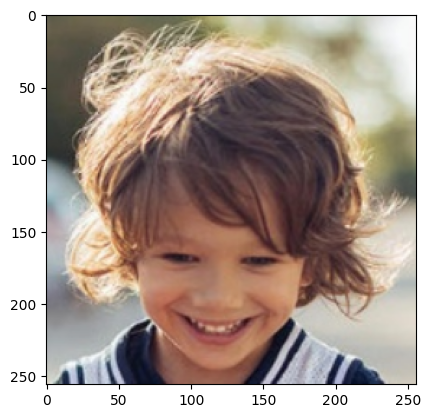

In [72]:
import matplotlib.pyplot as plt
plt.imshow(input_image[0]);

In [75]:
import gc
gc.collect()

0

In [78]:
!nvidia-smi

Tue Jul 18 08:50:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    32W /  70W |  15101MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [77]:
torch.autograd.set_detect_anomaly(True)
trainer.train()

OutOfMemoryError: ignored

In [ ]:
input_image = input_images[10]
input_image.shape

torch.Size([3, 256, 256])

In [ ]:
input_image = input_image.permute(2, 1, 0).unsqueeze(0)
input_image.shape

torch.Size([1, 256, 256, 3])

In [ ]:
out = trainer.generator.forward(
    x=input_images[5].unsqueeze(0),
    input_age=input_ages[5].type(torch.long).unsqueeze(0),
    output_age=output_ages[5].type(torch.long).unsqueeze(0)
)

out.shape

torch.Size([1, 3, 256, 256])

In [ ]:
out = out.permute(0, 3, 2, 1)
out.shape

torch.Size([1, 256, 256, 3])

In [ ]:
out.max(), out.min()

(tensor(1., grad_fn=<MaxBackward1>), tensor(-1., grad_fn=<MinBackward1>))

In [ ]:
F.relu(out[0]).max(), F.relu(out[0]).min()

(tensor(1., grad_fn=<MaxBackward1>), tensor(0., grad_fn=<MinBackward1>))

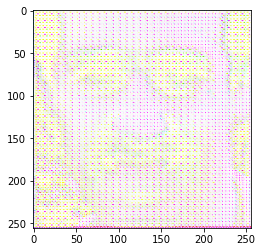

In [ ]:
import numpy as np
plt.imshow(F.relu(out[0]).detach().numpy());